# Введение в CasualImpact

CasualImpact - это метод, позволяющий оценить влияние дискретного события на временной ряд в условиях невозможности А/Б тестинга. Подход основан на том, что для интересующего ряда находятся другие временные ряды, которые с ним хорошо коррелируют. По этим рядам для интересующего ряда строится прогноз с момента, когда случилось внешнее событие. По различию прогноза и реального ряда рассчитывается эффект внешнего события.

Ряд, для которого измеряется эффект, далее называется рядом-таргетом. Ряды, по которым строится прогноз, называются ряды-предикторы.

Для прастического применения данного метода удобен пакет от Google с аналогичным названием.

## Установка CausalImpact

In [ ]:
install.packages("devtools")
library(devtools)
devtools::install_github("google/CausalImpact")

In [ ]:
library(CausalImpact)

## Пример использования

Создание модельных данных

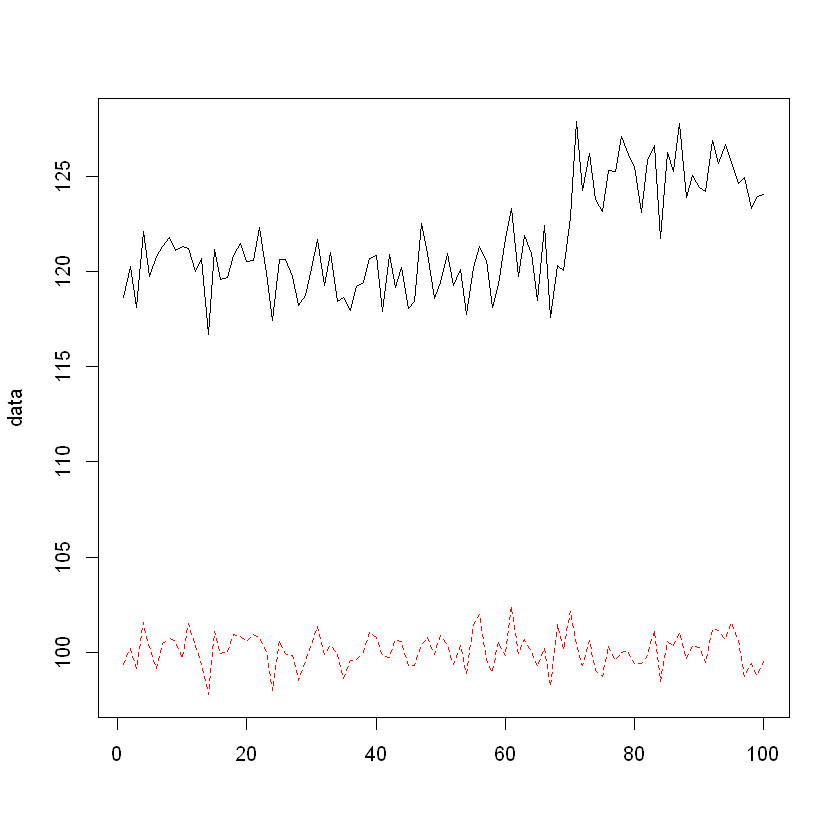

In [53]:
set.seed(1)
x1 <- 100 + arima.sim(model = list(1,2,0), n = 100)
y <- 1.2 * x1 + rnorm(100)
y[71:100] <- y[71:100] + 5
data <- cbind(y, x1)
matplot(data, type = "l")

Оценка воздействия

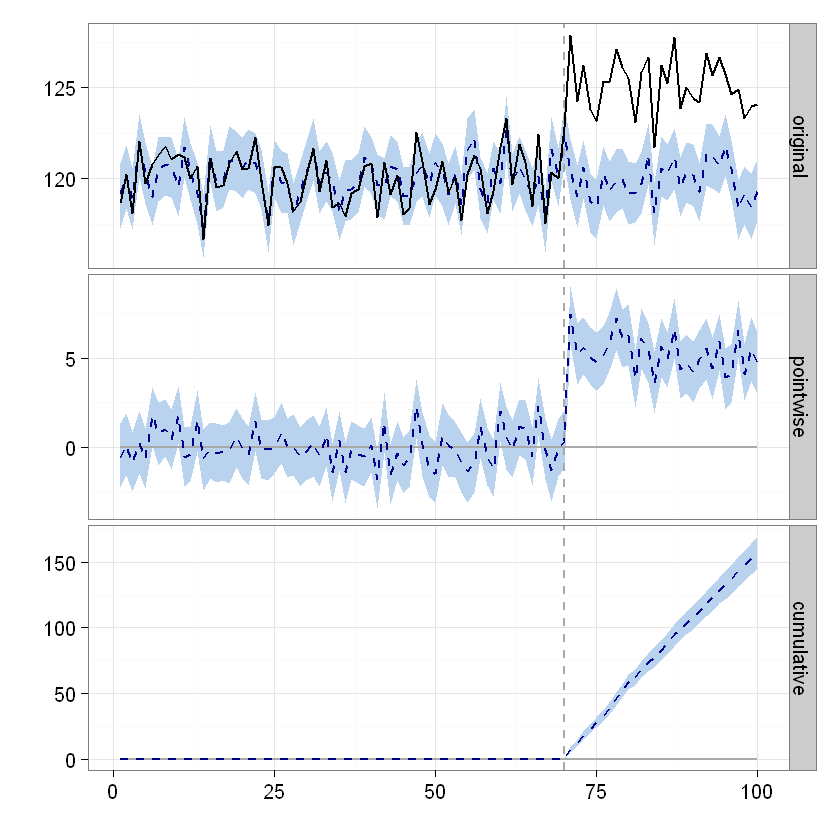

In [54]:
pre.period <- c(1, 70)
post.period <- c(71, 100)
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)

In [55]:
summary(impact)

Posterior inference {CausalImpact}

                         Average        Cumulative    
Actual                   125            3754          
Prediction (s.d.)        120 (0.21)     3597 (6.38)   
95% CI                   [120, 120]     [3585, 3610]  
                                                      
Absolute effect (s.d.)   5.3 (0.21)     157.5 (6.38)  
95% CI                   [4.8, 5.6]     [144.4, 169.0]
                                                      
Relative effect (s.d.)   4.4% (0.18%)   4.4% (0.18%)  
95% CI                   [4%, 4.7%]     [4%, 4.7%]    

Posterior tail-area probability p:   0.00111
Posterior prob. of a causal effect:  99.88901%

For more details, type: summary(impact, "report")



In [56]:
summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 125. By contrast, in the absence of an intervention, we would have expected an average response of 120. The 95% interval of this counterfactual prediction is [120, 120]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 5 with a 95% interval of [5, 6]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 3.75K. By contrast, had the intervention not taken place, we would have expected a sum of 3.6K. The 95% interval of this prediction is [3.59K, 3.61K].

The above results are given in terms of absolute numbers. In relative terms, the response variable showed an increase of +4

Проверка модели на "спокойном" периоде

In [ ]:
pre.period <- c(1, 40)
post.period <- c(41, 70)
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)
summary(impact)

In [57]:
?CausalImpact::CausalImpact

CausalImpact {CausalImpact},R Documentation
data,"Time series of response variable and any covariates. This can be a zoo object, a vector, a matrix, or a data.frame. In any of these cases, the response variable must be in the first column, and any covariates in subsequent columns. A zoo object is recommended, as its time indices will be used to format the x-axis in plot()."
pre.period,"A vector of two indices specifying the first and the last time point of the pre-intervention period in the response vector y. This period can be thought of as a training period, used to determine the relationship between the response variable and the covariates."
post.period,"A vector of two indices specifying the first and the last time point of the post-intervention period we wish to study. This is the period after the intervention has begun whose effect we are interested in. The relationship between response variable and covariates, as determined during the pre-period, will be used to predict how the response variable would have evolved during the post-period had no intervention taken place."
model.args,"Further arguments to adjust the default construction of the state-space model used for inference. One particularly important parameter is prior.level.sd, which specifies our a priori knowledge about the volatility of the data. For even more control over the model, you can construct your own model using the bsts package and feed the fitted model into CausalImpact(), as shown in Example 2."
bsts.model,"Instead of passing in data and having CausalImpact() construct a model, it is possible to create a custom model using the bsts package. In this case, omit data, pre.period, and post.period. Instead only pass in bsts.model, post.period.response, and alpha (optional). The model must have been fitted on data where the response variable was set to NA during the post-treatment period. The actual observed data during this period must then be passed to the function in post.period.response."
post.period.response,Actual observed data during the post-intervention period. This is required if and only if a fitted bsts.model is provided instead of data.
alpha,"Desired tail-area probability for posterior intervals. Defaults to 0.05, which will produce central 95% intervals."
response,Observed response as supplied to CausalImpact().
cum.response,Cumulative response during the modeling period.
point.pred,Posterior mean of counterfactual predictions.


In [ ]:
?bsts

=-=-=-=-= Iteration 0 Mon Feb 29 18:48:19 2016
 =-=-=-=-=
=-=-=-=-= Iteration 100 Mon Feb 29 18:48:19 2016
 =-=-=-=-=
=-=-=-=-= Iteration 200 Mon Feb 29 18:48:19 2016
 =-=-=-=-=
=-=-=-=-= Iteration 300 Mon Feb 29 18:48:19 2016
 =-=-=-=-=
=-=-=-=-= Iteration 400 Mon Feb 29 18:48:20 2016
 =-=-=-=-=
=-=-=-=-= Iteration 500 Mon Feb 29 18:48:20 2016
 =-=-=-=-=
=-=-=-=-= Iteration 600 Mon Feb 29 18:48:20 2016
 =-=-=-=-=
=-=-=-=-= Iteration 700 Mon Feb 29 18:48:20 2016
 =-=-=-=-=
=-=-=-=-= Iteration 800 Mon Feb 29 18:48:20 2016
 =-=-=-=-=
=-=-=-=-= Iteration 900 Mon Feb 29 18:48:20 2016
 =-=-=-=-=


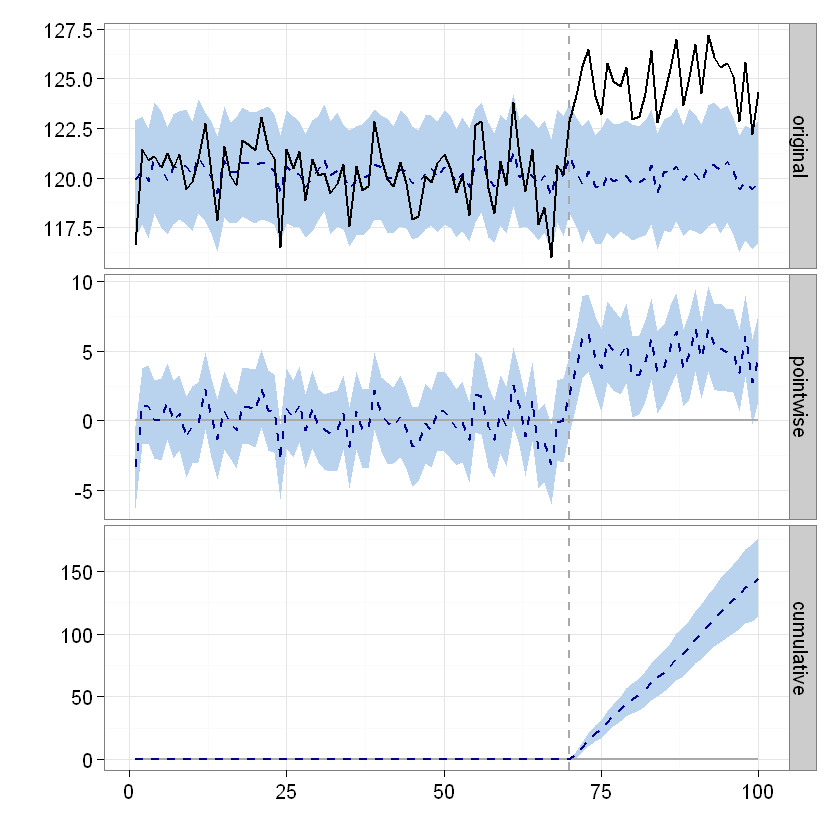

In [58]:
pre.period <- c(1, 70)
post.period <- c(71, 100)
y <- 1.2 * x1 + rnorm(100)
y[71:100] <- y[71:100] + 5

post.period.response <- y[post.period[1] : post.period[2]]
y[post.period[1] : post.period[2]] <- NA
ss <- AddLocalLevel(list(), y)
bsts.model <- bsts(y ~ x1, ss, niter = 1000)
impact <- CausalImpact(bsts.model = bsts.model, post.period.response = post.period.response)
plot(impact)

## Примеры результатов применения модели

Хорошо ли реализован подход CasualImpact в данных примерах?

Пример 1.
![Image 1](real_case_1.png)

Пример 2.
![Image 2](real_case_2.png)

Пример 3.
![Image 3](real_case_3.png)

Пример 4.
![Image 4](real_case_4.png)